# <center><u>**`Data Cleaning`**</u></center>

 Data cleaning is a part of the process on a data science project.

Data cleaning is the `process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data `within a dataset.
<br>
When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information for your analysis and model building.

In [ ]:
# import pandas and numpy with alias pd and np respectively
import pandas as pd
import numpy as np

Create a dataframe, d1 = pd.DataFrame( {‘Temperature’ : [1, np.nan, 3, 2, 3] ,’Humidity’ : [22, np.nan, 2 , np.nan, 20 ] })

In [ ]:
#create d1
d1 = pd.DataFrame({"Temperature": [1, np.nan, 3, 2, 3], "Humidity": [22, np.nan, 2, np.nan, 20]})

print the dataframe d1

In [ ]:
#print d1
d1

,Temperature,Humidity
0,1.0,22.0
1,NaN,NaN
2,3.0,2.0
3,2.0,NaN
4,3.0,20.0


Find whether the given dataframe contain any missing values?

In [ ]:
#check for null
d1.isnull()


,Temperature,Humidity
0,False,False
1,True,True
2,False,False
3,False,True
4,False,False


How many missing values does each column have?

In [ ]:
#total null
d1.isnull().sum()

Temperature    1
Humidity       2
dtype: int64

#### **`Dealing with missing values`**
<br>Now, we know we have missing values, the next thing that we need to work on, is how to deal with these missing values

#### **`Method 1: Delete the rows which contain missing values.`**
 This method include dropping all the rows that have missing value in any column.

Use a suitable method to drop all the rows having missing values and save the change in d2 variable

In [ ]:
d2 = d1.dropna()

Print d2

In [ ]:
#print nan
d2

,Temperature,Humidity
0,1.0,22.0
2,3.0,2.0
4,3.0,20.0


Hey Remember : droping rows with nan is one of the method to deal with missing values. But you have to decide if you need to go for this method by checking percentage of nan present in the dataframe.

If a column is having more than 60% of nan values then its better to remove such variables altogether if business permits

- ## **`Method 2: Replacing missing values`**
Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation

Impute the missing values with constant number of your choice

In [ ]:
# The below output has imputed missing  values with 100

d3 = d1.replace("nan", np.nan).fillna("100")
d3

,Temperature,Humidity
0,1.0,22.0
1,100,100
2,3.0,2.0
3,2.0,100
4,3.0,20.0


Do you think its a  good way to treat Nan values? What if such constant values are not suitable for our further analysis?
Try to give your thoughts on this.

In [ ]:
# it is not a good way
# the result might be too inaccurate from the actual data if we just replace it by any random value

Impute the missing values with mean

In [ ]:
#  imputing mean
d1_mean = d1.fillna(d1.mean())
d1_mean

,Temperature,Humidity
0,1.00,22.000000
1,2.25,14.666667
2,3.00,2.000000
3,2.00,14.666667
4,3.00,20.000000


Impute the missing values with median

In [ ]:
#median imputing
d1_median = d1.fillna(d1.median())
d1_median

,Temperature,Humidity
0,1.0,22.0
1,2.5,20.0
2,3.0,2.0
3,2.0,20.0
4,3.0,20.0


Replacing with the mean, mode or median approximations are a statistical approach of handling the missing values.

Another Fun fact:
    
    This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns.

Impute Nan with forward fill

In [ ]:
#forward fill
d1_ffill = d1.fillna(d1.ffill(axis = 1))
d1_ffill


,Temperature,Humidity
0,1.0,22.0
1,NaN,NaN
2,3.0,2.0
3,2.0,2.0
4,3.0,20.0


Impute Nan with backward fill

In [ ]:
#backward fill
d1_bfill = d1.fillna(d1.bfill(axis = 1))
d1_bfill

,Temperature,Humidity
0,1.0,22.0
1,NaN,NaN
2,3.0,2.0
3,2.0,NaN
4,3.0,20.0


Hey a fun fact here, as sweet as a cookie:

- ffill/pad/bfill are good imputation method if our data is of time series. This would keep the trend unaffected for our analysis.

Impute nan using interpolation method

In [ ]:
#interpolate
d1_interpolate = d1.fillna(d1.interpolate())
d1_interpolate

,Temperature,Humidity
0,1.0,22.0
1,2.0,12.0
2,3.0,2.0
3,2.0,11.0
4,3.0,20.0


You lucky champ! you got to know another amazing fact:
 - Interpolation method by default is linear in nature. It is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.


You can explore other techniques involved in interplolation method, which might be usefull for your project.

Perform KNN imputation


In [ ]:
# Hint: Import KNNImputer and impute it on d1. Also note: Use n_neighbors=2
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)

imputer.fit_transform(d1)

array([[ 1.        , 22.        ],
       [ 2.25      , 14.66666667],
       [ 3.        ,  2.        ],
       [ 2.        , 12.        ],
       [ 3.        , 20.        ]])

Point to ponder: KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space.

Do you think scaling is required to implement this method?. Yes you are right the answer is YES.
Can you comment below why normalized data is required, so that we understand your logic on this.

It requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values.

## **`Dropping Irrelevant Columns`**


Create a dataframe df = pd.DataFrame(np.random.randint(0,100,size=(100, 5)), columns=list('ABCDE'))


In [ ]:
np.random.seed(10)

df = pd.DataFrame(np.random.randint(0,100,size=(100, 5)), columns=list('ABCDE'))

#define df

print df

In [ ]:
#print df
print(df)

     A   B   C   D   E
0    9  15  64  28  89
1   93  29   8  73   0
2   40  36  16  11  54
3   88  62  33  72  78
4   49  51  54  77  69
..  ..  ..  ..  ..  ..
95   3  50  59  34  21
96  16  18  61  54  60
97  21  87  83  71  16
98  67  38  27  96  87
99  98  89  16  82  19

[100 rows x 5 columns]


Note: Since all the rows are having random numbers, your dataframe observations might be different than the output given above

Suppose for our analysis our project do not require column E. So you need to remove this column. update this new change using inplace parameter

In [ ]:
#drop E
df.drop(["E"], axis = 1, inplace = True)

Check if column **E** is removed by printing head of df

In [ ]:
#df head
df.head()

,A,B,C,D
0,9,15,64,28
1,93,29,8,73
2,40,36,16,11
3,88,62,33,72
4,49,51,54,77


### `Ensure requirements as per domain`


Shallow copy the dataframe df in variable df2 and print df2 head






In [ ]:
df2= df.copy(deep = False)

#df2 head
df2.head()

,A,B,C,D
0,9,15,64,28
1,93,29,8,73
2,40,36,16,11
3,88,62,33,72
4,49,51,54,77


Suppose your domain expert says to filter column B with even numbers to do correct analysis. Implement the same below and update the change in varaible df2.

In [ ]:
df2 = df2[df2['B'] % 2 == 0]


print updated head of *df2*

In [ ]:
# df2 head
df2.head()

,A,B,C,D
2,40,36,16,11
3,88,62,33,72
6,30,30,89,12
9,11,28,74,88
10,15,18,80,71


### `Creating a sensible index values`



Oops. The index in this dataframe doesn't make sense. please correct index in a sequential manner starting from 1. Save the updates in df2

In [ ]:
#set proper index
df2.index = np.arange(1, len(df2) + 1)

print df2 head again

In [ ]:
# df2 head
df2.head()

,A,B,C,D
1,40,36,16,11
2,88,62,33,72
3,30,30,89,12
4,11,28,74,88
5,15,18,80,71


## **`Renaming column names to meaningful names.`**


Now df2 columns represents marks of the adventurous 'Anand', the brave 'Barkha', the compassionate 'Chandu' and the dashing 'Daniel'. Rename the columns with their name inplace of their first letter of their name.

In [ ]:
#column renaming
df2.columns = ['Anand', 'Barkha', 'Chandu', 'Daniel']


print df2 tail with updated column names

In [ ]:
# df2 head
df2.head()

,Anand,Barkha,Chandu,Daniel
1,40,36,16,11
2,88,62,33,72
3,30,30,89,12
4,11,28,74,88
5,15,18,80,71


Yeah! now the data looks pretty meaningful to study

## **`Treating Duplicate Data`**


Make another dataframe df3 by deep copying df2.

In [ ]:
df3 = df2.copy(deep = True)

Make another column in df3 with name 'dummy' having 0 as values
throughout the rows.

In [ ]:
#assign dummy column full of zero value
df3["dummy"] = 0

In [ ]:
# print head of df, df2 and df3
print(df.head())
print(df2.head())
print(df3.head())

    A   B   C   D
0   9  15  64  28
1  93  29   8  73
2  40  36  16  11
3  88  62  33  72
4  49  51  54  77
   Anand  Barkha  Chandu  Daniel
1     40      36      16      11
2     88      62      33      72
3     30      30      89      12
4     11      28      74      88
5     15      18      80      71
   Anand  Barkha  Chandu  Daniel  dummy
1     40      36      16      11      0
2     88      62      33      72      0
3     30      30      89      12      0
4     11      28      74      88      0
5     15      18      80      71      0


Hey buddy! Don't you think, there is some difference between copy operation used for creating df2 and df3.

If you think Yes, Then please comment below the difference

In [ ]:
'''
comment
Shallow Copy
Shallow Copy stores the references of objects to the original memory address.
Shallow Copy reflects changes made to the new/copied object in the original object.
Shallow Copy stores the copy of the original object and points the references to the objects.
Shallow copy is faster.

Deep Copy
Deep copy stores copies of the object’s value.
Deep copy doesn’t reflect changes made to the new/copied object in the original object.
Deep copy stores the copy of the original object and recursively copies the objects as well.
Deep copy is comparatively slower.
'''

print tail of df3

In [ ]:
# df3 tail
df3.tail()

,Anand,Barkha,Chandu,Daniel,dummy
44,1,82,34,11,0
45,74,36,6,63,0
46,3,50,59,34,0
47,16,18,61,54,0
48,67,38,27,96,0


make an array name 'ListB' with values of column 'Barkha'

In [ ]:
ListB = df2.loc[:, "Barkha"]

Print ListB

In [ ]:
#print ListB
print(ListB)

1     36
2     62
3     30
4     28
5     18
6     50
7     88
8     50
9     80
10    66
11    96
12    30
13     4
14    30
15     2
16    42
17    94
18    18
19    44
20    68
21    58
22    48
23    70
24    22
25    36
26    32
27    32
28    96
29    30
30    86
31     0
32    76
33    88
34    64
35    52
36    46
37    20
38    66
39    56
40     8
41    68
42    50
43    28
44    82
45    36
46    50
47    18
48    38
Name: Barkha, dtype: int64


Assign this array values as another column in df3 with name 'Anonymous'

In [ ]:
#create Anonymous column
df3["Anonymous"] = ListB

Create a dataframe 'ListA' with values of row index 3, 10 and 40

In [ ]:
ListA = pd.DataFrame(df3.loc[[3, 10, 40], :])


print ListA

In [ ]:
# print ListA
print(ListA)

    Anand  Barkha  Chandu  Daniel  dummy  Anonymous
3      30      30      89      12      0         30
10     96      66      67      62      0         66
40     74       8      92      32      0          8


Concat ListA to df3 ignoring the index values of ListA so that we can maintain the sequential index value thoughout the dataframe.

In [ ]:
df3 = pd.concat([ListA, df3], axis=0, ignore_index = True)

print head of df3

In [ ]:
# df3 head
df3.head()

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous
0,30,30,89,12,0,30
1,96,66,67,62,0,66
2,74,8,92,32,0,8
3,40,36,16,11,0,36
4,88,62,33,72,0,62


Check if there is any duplicate rows present in the dataframe df3

In [ ]:
#check duplicate
df3[df3.duplicated()]

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous
5,30,30,89,12,0,30
12,96,66,67,62,0,66
42,74,8,92,32,0,8


By above output it seems we do have duplicated rows in our dataset

Drop duplicated rows using pandas function keeping first values of such duplicated observations

In [ ]:
#drop duplicate
df3 = df3.drop_duplicates()

Check again if we have any duplicate row values present

In [ ]:
#check duplicate
df3[df3.duplicated()]

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous


Yipeee!! Did you notice the dataframe is free from any duplicate rows now.

Drop any duplicate columns present in the dataframe df

In [ ]:
df3 = df3.T.drop_duplicates().T

#print df3
print(df3)

    Anand  Barkha  Chandu  Daniel  dummy
0      30      30      89      12      0
1      96      66      67      62      0
2      74       8      92      32      0
3      40      36      16      11      0
4      88      62      33      72      0
6      11      28      74      88      0
7      15      18      80      71      0
8      88      50      54      34      0
9      77      88      15       6      0
10     97      50      45      40      0
11     81      80      41      90      0
13     88      96      73      40      0
14     28      30      89      25      0
15     33       4      87      94      0
16     68      30      70      74      0
17      9       2      65      13      0
18     62      42      34      40      0
19     32      94      86      58      0
20     45      18      50      44      0
21      6      44       9      50      0
22     44      68      14       4      0
23     39      58      81      39      0
24     69      48      60      58      0
25      5      7

Did you notice which Column is dropped?
I am sure you noticed it.
Name that column below

In [ ]:
#Column: Anonymous

### `Treating constant column values`


Check unique values in each columns

In [ ]:
# df3 unique value
df3.nunique(axis = 0)

Anand     42
Barkha    32
Chandu    40
Daniel    36
dummy      1
dtype: int64

By above output which column has only 1 value as unique throught the rows?
Yeah! you are right, its dummy column.
So lets drop it

Drop dummy column as it has constant values which will not give us any information and save the changes to df3 using inplace parameter

In [ ]:
# drop dummy
df3.drop(["dummy"], axis = 1)

,Anand,Barkha,Chandu,Daniel
0,30,30,89,12
1,96,66,67,62
2,74,8,92,32
3,40,36,16,11
4,88,62,33,72
6,11,28,74,88
7,15,18,80,71
8,88,50,54,34
9,77,88,15,6
10,97,50,45,40


print final obtained dataframe df3

In [ ]:
# print df3
print(df3)

    Anand  Barkha  Chandu  Daniel  dummy
0      30      30      89      12      0
1      96      66      67      62      0
2      74       8      92      32      0
3      40      36      16      11      0
4      88      62      33      72      0
6      11      28      74      88      0
7      15      18      80      71      0
8      88      50      54      34      0
9      77      88      15       6      0
10     97      50      45      40      0
11     81      80      41      90      0
13     88      96      73      40      0
14     28      30      89      25      0
15     33       4      87      94      0
16     68      30      70      74      0
17      9       2      65      13      0
18     62      42      34      40      0
19     32      94      86      58      0
20     45      18      50      44      0
21      6      44       9      50      0
22     44      68      14       4      0
23     39      58      81      39      0
24     69      48      60      58      0
25      5      7

### `Iterating dataframes`


Let's look at three main ways to iterate over DataFrames.

1. iteritems()
2. iterrows()
3. itertuples()

We will also see time taken by these methods to print our dataframe.

**1. Iterating DataFrames with iteritems()**

Lets iterate over rows of df3 uisng iteritems.



In [ ]:
import time
start = time.time()

#Use iteritems to iterate
for column_name, column_data in df3.iteritems():
  print(column_name, "\n", column_data)


print('Time taken(sec): ',(time.time()-start)*1000)

Anand 
 0     30
1     96
2     74
3     40
4     88
6     11
7     15
8     88
9     77
10    97
11    81
13    88
14    28
15    33
16    68
17     9
18    62
19    32
20    45
21     6
22    44
23    39
24    69
25     5
26     4
27    10
28    85
29    31
30     0
31     2
32    63
33    19
34    58
35     7
36    27
37    27
38    99
39    84
40    77
41    82
43    87
44    50
45     1
46     1
47    74
48     3
49    16
50    67
Name: Anand, dtype: int64
Barkha 
 0     30
1     66
2      8
3     36
4     62
6     28
7     18
8     50
9     88
10    50
11    80
13    96
14    30
15     4
16    30
17     2
18    42
19    94
20    18
21    44
22    68
23    58
24    48
25    70
26    22
27    36
28    32
29    32
30    96
31    30
32    86
33     0
34    76
35    88
36    64
37    52
38    46
39    20
40    66
41    56
43    68
44    50
45    28
46    82
47    36
48    50
49    18
50    38
Name: Barkha, dtype: int64
Chandu 
 0     89
1     67
2     92
3     16
4     33
6     74
7  

Did you notice buddy how iteritems are iterating over df3.

Along with ways each iterating function works, also keep tallying the time taken for all other lopps too!. This will be fun, lets check iterrows()

**2. Iterating DataFrames with iterrows()**

In [ ]:
import time
start = time.time()
#Use iterrows to iterate
for index, data in df3.iterrows():
  print(index, "\n", data)

print('Time taken(sec): ',(time.time()-start)*1000)

0 
 Anand     30
Barkha    30
Chandu    89
Daniel    12
dummy      0
Name: 0, dtype: int64
1 
 Anand     96
Barkha    66
Chandu    67
Daniel    62
dummy      0
Name: 1, dtype: int64
2 
 Anand     74
Barkha     8
Chandu    92
Daniel    32
dummy      0
Name: 2, dtype: int64
3 
 Anand     40
Barkha    36
Chandu    16
Daniel    11
dummy      0
Name: 3, dtype: int64
4 
 Anand     88
Barkha    62
Chandu    33
Daniel    72
dummy      0
Name: 4, dtype: int64
6 
 Anand     11
Barkha    28
Chandu    74
Daniel    88
dummy      0
Name: 6, dtype: int64
7 
 Anand     15
Barkha    18
Chandu    80
Daniel    71
dummy      0
Name: 7, dtype: int64
8 
 Anand     88
Barkha    50
Chandu    54
Daniel    34
dummy      0
Name: 8, dtype: int64
9 
 Anand     77
Barkha    88
Chandu    15
Daniel     6
dummy      0
Name: 9, dtype: int64
10 
 Anand     97
Barkha    50
Chandu    45
Daniel    40
dummy      0
Name: 10, dtype: int64
11 
 Anand     81
Barkha    80
Chandu    41
Daniel    90
dummy      0
Name: 11, dtype: i

**3. Iterating DataFrames with itertuples()**

In [ ]:
#iterate df3 using itertuples
import time
start = time.time()

#Use itertuples to iterate
for i in df3.itertuples():
  print(i)


print('Time taken(sec): ',(time.time()-start)*1000)

NameError: ignored

Hey buddy! so as you have seen every method works differently
    
    iteritems(): Helps to iterate over each element of the set, column-wise.
    iterrows(): Each element of the set, row-wise.
    itertuple(): Each row and form a tuple out of them.

But if you ask for speed. The most best perfromance is given by itertuples compared to other two iterating methods.
So if anytime you need to save your computation time on iteration of dataframes you can go for itertuples. Was'nt it fun?:)

### `Regular Expression`


Reference: Watch the video below

Reference doc: https://www.guru99.com/python-regular-expressions-complete-tutorial.html

Python has a module named re to work with RegEx


### **!Are you ready to try regex on dataframes?**

*So here we go.!*

We are gonna try out following awesome re module functions

1. findall
2. search
3. sub
4. split

If you want you can also refer the below regular expression syntax.

![image.png](attachment:image.png)


Hey future data scientists! we will now use regex on dataframes for data cleaning.

Who doesn't know Trump?. Lets dowload this interesting dataset of Trump insult tweets :https://www.kaggle.com/ayushggarg/all-trumps-twitter-insults-20152021/download

On this dataset we will learn how to use regex for data cleaning. By the way it will be also very usefull for feature engineering too!.



In [ ]:
#load dataset
tweet_data = pd.read_csv("/content/trump_insult_tweets_2014_to_2021.csv")

In [ ]:
#import re module
import re

#print head of tweet_data
tweet_data.head()


,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


Lets do some analysis using regex on this dataset

Before we go ahead, do you remember apply function? because you will have to require apply function to impliment regex methods.

You can refer video below:
**1. findall()**

Make another column 'year' with year in each row using regex on date column.


In [ ]:
# create a function which takes date as parameter and applies regex on it
def year(i):
  x =  re.search('(\d\d\d\d)', i)
  return x.group()

#use apply function on tweet_data to use above function in order to make year column
tweet_data["year"] = tweet_data["date"].apply(year)

#print tweet_data head
tweet_data.head()

,Unnamed: 0,date,target,insult,tweet,year
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015


lets filter year from 2020-2021 which was the election time in USA.

**2. search**

We will use regex search for this

In [ ]:
# create a function which takes year as parameter and applies regex on it
def yr_filter(year):
  x = re.search("^202\d", year)
  if x:
    return year

#use apply function on tweet_data to use above function in order to search tweets of 2020-2021
tweet_data["year"] = tweet_data["year"].apply(yr_filter)

#tweet_data head
tweet_data.head()

,Unnamed: 0,date,target,insult,tweet,year
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",None
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",None
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,None
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,None
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",None


You can also do the same thing using regex match function to do this which is vailable in pandas

Reference: https://www.geeksforgeeks.org/python-pandas-series-str-match/

In [ ]:
# apply pandas str.match() function

tweet_data[tweet_data["year"].str.match('^202\d')== True]

,Unnamed: 0,date,target,insult,tweet,year
7621,7622,2020-01-01,impeachment-inquiry,The greatest Witch Hunt in U.S. history,Thank you Steve. The greatest Witch Hunt in U....,2020
7622,7623,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...,2020
7623,7624,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun...",2020
7624,7625,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ...",2020
7625,7626,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...,2020
...,...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...,2021
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they...",2021
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late...",2021
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...,2021


cool right!

You got some null values after applying above function. Lets drop them using dropna function. Also drop 'Unnamed: 0' column as it does not give any information.


In [ ]:
#drop na and Unnamed: 0 column
tweet_data.dropna(inplace = True)
tweet_data.drop(["Unnamed: 0"], axis = 1, inplace = True)
tweet_data.head()

,date,target,insult,tweet,year
7621,2020-01-01,impeachment-inquiry,The greatest Witch Hunt in U.S. history,Thank you Steve. The greatest Witch Hunt in U....,2020
7622,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...,2020
7623,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun...",2020
7624,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ...",2020
7625,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...,2020


**3. sub() Function**

Now you have filtered the dataset with 2739 rows. Let's remove all @ from tweet column suing re sub() function.

In [ ]:
# create a function which takes tweet as parameter and applies regex on it
def tweet(i):
  return re.sub(r"@", "", i)



#use apply function on tweet_data to use above function in order to remove @ from tweets
tweet_data["tweet"] = tweet_data["tweet"].apply(tweet)

#tweet_data head
tweet_data.head()

,date,target,insult,tweet,year
7621,2020-01-01,impeachment-inquiry,The greatest Witch Hunt in U.S. history,Thank you Steve. The greatest Witch Hunt in U....,2020
7622,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...,2020
7623,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun...",2020
7624,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ...",2020
7625,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...,2020


You can also use the sub function just in one line using list comprehension. Can you try doing it below?

In [ ]:
# sub() suing list comprehension
tweet_data["tweet"] = [re.sub(r"@", "", str(x)) for x in tweet_data["tweet"]]

**4. split() Function**

Lets now split the column target by making another column Name which has name before hyphen("-")


In [ ]:
# create a function which takes target as parameter and applies regex on it
def target(i):
  x = re.split("-", i, 1)
  if x:
    return x[0]

#use apply function on tweet_data to use above function in order to create Name column
tweet_data["Name"] = tweet_data["target"].apply(target)

#tweet_data head
tweet_data.head()

,date,target,insult,tweet,year,Name
7621,2020-01-01,impeachment-inquiry,The greatest Witch Hunt in U.S. history,Thank you Steve. The greatest Witch Hunt in U....,2020,impeachment
7622,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...,2020,impeachment
7623,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun...",2020,impeachment
7624,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ...",2020,los
7625,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...,2020,impeachment


Now can you filter out Name which are specially targetted for trump? Lets do it below and check how many such tweets are there.

In [ ]:
#filter Name which is euqals to trump
tweet_data[tweet_data["Name"]== "trump"]

,date,target,insult,tweet,year,Name
7859,2020-02-09,trump-russia,"THE WHOLE SCAM INVESTIGATION, THE MUELLER REPO...",FBI Director Christopher Wray just admitted th...,2020,trump
7860,2020-02-09,trump-russia,the biggest political crime in American Histor...,....This is the biggest political crime in Ame...,2020,trump
7861,2020-02-09,trump-russia,THE PARTY IN POWER ILLEGALLY SPIED ON MY CAMPAIGN,....This is the biggest political crime in Ame...,2020,trump
7890,2020-02-12,trump-russia,an investigation that was illegal,Who are the four prosecutors (Mueller people?)...,2020,trump
7891,2020-02-12,trump-russia,the Mueller Scam,Who are the four prosecutors (Mueller people?)...,2020,trump
...,...,...,...,...,...,...
9658,2020-10-07,trump-russia,Hoax Scandal,All Russia Hoax Scandal information was Declas...,2020,trump
9659,2020-10-07,trump-russia,the biggest political crime in the history of ...,All Russia Hoax Scandal information was Declas...,2020,trump
10091,2020-11-22,trump-russia,never ending Witch Hunt,Thanks Mark. It’s all a continuation of the ne...,2020,trump
10188,2020-12-09,trump-critics,obnoxious,Germany has consistently been used by my obnox...,2020,trump


So here you got total of 65 records which were  tweeted on Donald Trump in the span of 2020-2021.

Well done buddy! You have learned how to apply regex on dataframes. Regex are mostly used for datasets which are having textual information.

Good job!  Now our interesting trump insult tweet data is somewhat cleaned.

# <center><u> Exploratory Data Analysis</u> </center>

# `Problem Statement:`
We have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car used to predict its price.

### `TO  DOWNLOAD DATASET USED`: https://drive.google.com/drive/folders/15UNxHTINnphfk43m36ujfw6epMG-pDWp?usp=sharing



## 1. Importing the necessary libraries












In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## 2. Download the dataset and load into dataframe

Please download the dataset from [here](https://www.kaggle.com/CooperUnion/cardataset) and extract the csv file. Load the csv file as pandas dataframe.

In [ ]:
## load the csv file
df = pd.read_csv("/content/data.csv")

Now we observe the each features present in the dataset.<br>

 `Make:` The Make feature is the company name of the Car.<br>
`Model:` The Model feature is the model or different version of Car models.<br>
`Year:`  The year describes the model has been launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` It's say the Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` It define the nos of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.







In [ ]:
## print the head of the dataframe
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Check the datatypes

In [ ]:
# Get the datatypes of each columns number of records in each column.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## 4. Dropping irrevalent columns

If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.


The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe.


`cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]`

These features are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset.

In [ ]:
# initialise cols_to_drop
cols_to_drop = cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]


In [ ]:
# drop the irrevalent cols and print the head of the dataframe
df = df.drop(cols_to_drop, axis = 1)

# print df head
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5.  Renaming the columns

Now, Its time for renaming the feature to useful feature name. It will help to use them in model training purpose.<br>

We have already dropped the unneccesary columns, and now we are left with useful columns. One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

The given dict represents (in key value pair) the previous name, and the new name for the dataframe columns

In [ ]:
# rename cols
rename_cols = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode",	"highway MPG": "MPG_H",	"city mpg": "MPG-C", "MSRP": "Price"}


In [ ]:
# use a pandas function to rename the current columns -
df.rename(columns = rename_cols, inplace = True)


In [ ]:
# Print the head of the dataframe
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 6. Dropping the duplicate rows

There are many rows in the dataframe which are duplicate, and hence they are just repeating the information. Its better if we remove these rows as they don't add any value to the dataframe.

For given data, we would like to see how many rows were duplicates. For this, we will count the number of rows, remove the dublicated rows, and again count the number of rows.

`Documentation Link`: Must go through this - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [ ]:
# number of rows before removing duplicated rows
df.count()


Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG_H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:
# drop the duplicated rows
df = df.drop_duplicates()

# print head of df
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
# Count Number of rows after deleting duplicated rows
df.count()


Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG_H           10925
MPG-C           10925
Price           10925
dtype: int64

## 7. Dropping the null or missing values

Missing values are usually represented in the form of Nan or null or None in the dataset.

Finding whether we have null values in the data is by using the isnull() function.

There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

`Documentation Link`: Must go through this - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
# check for nan values in each columns
print(df.isnull().sum())


Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG-C            0
Price            0
dtype: int64


As we can see that the HP and Cylinders have null values of 69 and 30. As these null values will impact on models' accuracy. So to avoid the impact we will drop the these values. As these values are small camparing with dataset  that will not impact any major affect on model accuracy so we will drop the values.

In [ ]:
# drop missing values
df = df.dropna()


In [ ]:
# Make sure that missing values are removed
# check number of nan values in each col again

print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG-C           0
Price           0
dtype: int64


In [ ]:
#Describe statistics of df

df.describe()

,Year,HP,Cylinders,MPG_H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## 8. Removing outliers

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

### Detecting outliers

There many techiniques to detect outliers. Let us first see the simplest form of visualizing outliers.

Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous.

`Documentation Link`: Must go through this - https://seaborn.pydata.org/generated/seaborn.boxplot.html

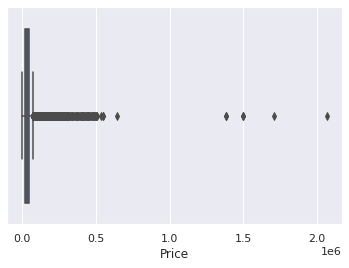

In [ ]:
## Plot a boxplot for 'Price' column in dataset.

sns.boxplot(x =df["Price"])


### **`Observation:`**<br>

Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.

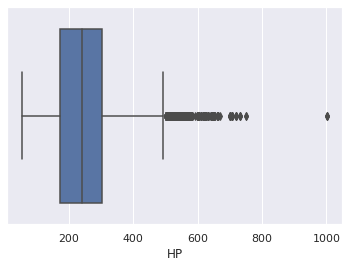

In [ ]:
## PLot a boxplot for 'HP' columns in dataset

sns.boxplot(x =df["HP"])

### **`Observation:`**<br>
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

print all the columns which are of int or float datatype in df.

Hint: Use loc with condition

In [ ]:
# print all the columns which are of int or float datatype in df.
df.loc[:, df.dtypes != object]

,Year,HP,Cylinders,MPG_H,MPG-C,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


### `Save the column names of the above output in variable list named 'l'`


In [ ]:
# save column names of the above output in variable list
l = list(df.loc[:, df.dtypes != object].columns)
l

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price']

## **`Outliers removal techniques`**

1. **Using IQR Technique**


**Here comes cool Fact for you!**

IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

The anatomy of boxplot is given below.

![image.png](attachment:image.png)

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

In [ ]:
## define Q1 and Q2
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# define IQR (interquantile range)
IQR = Q3 - Q1

# define df2 after removing outliers
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]


2. **Outlier removal using Z-score function**

  - The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.

We will use Z-score function defined in scipy library to detect the outliers in dataframe df having columns which are in variable 'l'


In [ ]:
# use stats.zscore on list l from above code and take abs value
z = np.abs(stats.zscore(df[l]))

# print z
z


,Year,HP,Cylinders,MPG_H,MPG-C,Price
0,0.014743,0.732425,0.174386,0.041059,0.049314,0.058463
1,0.014743,0.413769,0.174386,0.225455,0.049314,0.029591
2,0.014743,0.413769,0.174386,0.225455,0.101214,0.098621
3,0.014743,0.223542,0.174386,0.225455,0.199843,0.209390
4,0.014743,0.223542,0.174386,0.225455,0.199843,0.128320
...,...,...,...,...,...,...
11909,0.157006,0.413769,0.174386,0.440829,0.500900,0.058222
11910,0.157006,0.413769,0.174386,0.440829,0.500900,0.227587
11911,0.157006,0.413769,0.174386,0.440829,0.500900,0.130463
11912,0.299270,0.413769,0.174386,0.440829,0.500900,0.135279


Hey buddy! do you understand the above output? Difficult right? let’s try and define a threshold to identify an outlier so that we get a clear picture of whats going on.

We will not spare you without a good fact! ;)

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [ ]:
# print the values in dataframe which are less than the threshold and save this dataframe as df3
threshold1 = 3
threshold2 = -3
df3 = df[((z < threshold1)|(z > threshold2)).all(axis = 1)]

# print df3
df3


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


print the shape difference of df df2 and df3.

In [ ]:
# print the shape difference of df df2 and df3.
print(df.shape)
print(df2.shape)
print(df3.shape)

(10827, 10)
(9191, 10)
(10827, 10)


Interesting right? Bam! you have removed 489 rows from the dataframe which was detected as outlier by Z-score technique.
and removed 1636 rows from the dataframe which was detected as outlier by IQR technique.

By the way there are many other techniques by which you can remove outliers. You can explore on more interesting techniques
available.

We know you must be having many questions in you mind like:
- Which technique we should use and why?
- Is it neccessary that whatever detected as outlier are really outliers?

Dont't worry these delimma is faced my many data analyst. We provide you with good references below for you to explore further on this

- https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
- https://www.researchgate.net/post/Which-is-the-best-method-for-removing-outliers-in-a-data-set

Lets find unique values and there counts in each column in df using value counts function.

Value counts reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In [ ]:
# find unique values and there counts in each column in df using value counts function.
for i in df.columns:
    print ("--------------- %s ----------------" % i)
    print(df[i].value_counts(ascending = False))

--------------- Make ----------------
Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo      

## Visualising Univariate Distributions

We will use seaborn library to visualize eye catchy univariate plots.

Do you know? you have just now already explored one univariate plot. guess which one? Yeah its box plot.


### 1 . Histogram & Density Plots

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

`Documentation Link`: Must go through this - https://seaborn.pydata.org/generated/seaborn.displot.html

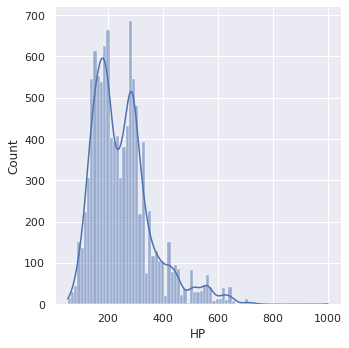

In [ ]:
#ploting distplot for variable HP

sns.displot(data=df, x="HP", kde = True)

### **`Observation:`**
We plot the Histogram of feature HP with help of distplot in seaborn.<br>
In this graph we can see that there is max values near at 200. similary we have also the 2nd highest value near 400 and so on. <br>
It represents the overall distribution of continuous data variables.<br>

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.
- Hint: use matplotlib subplot function

`CHECK THIS FOR SUBPLOT`: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

<Figure size 1080x720 with 0 Axes>

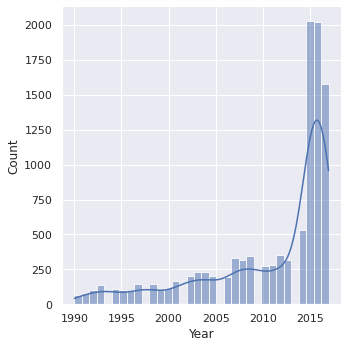

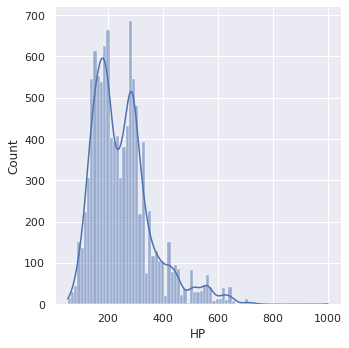

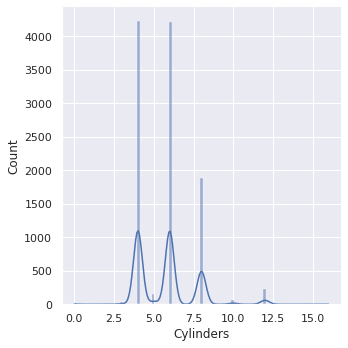

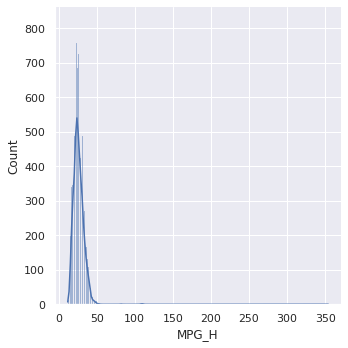

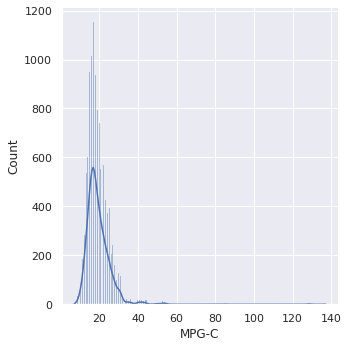

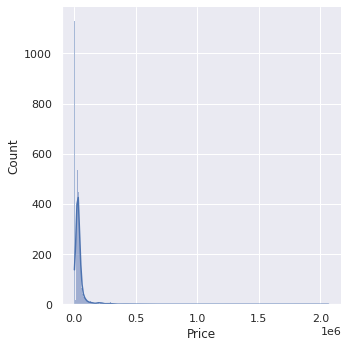

In [ ]:
# plot all the columns present in list l together using subplot of dimention (2,3).
c=0
plt.figure(figsize=(15,10))
for i in l:
    sns.displot(data=df, x = df[i], kde = True)
plt.show()


## 2. Bar plots


Plot a histogram depicting the make in X axis and number of cars in y axis. <br>

`BAR PLOT LINK USING KIND PARAMETER`: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

Text(0.5, 0, 'Make')

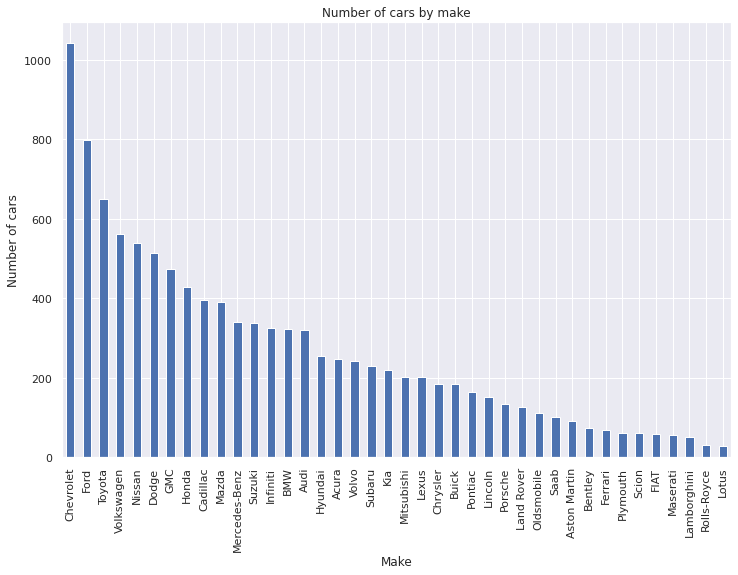

In [ ]:
plt.figure(figsize = (12,8))

# use nlargest and then .plot to get bar plot like below output
df.Make.value_counts().nlargest(40).plot(kind = "bar", figsize = (12,8))

plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')


### **`Observation:`**
In this plot we can see that we have plot the bar plot with the cars model and nos. of cars.

### 3. Count Plot

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


 Plot a countplot for a variable Transmission vertically with hue as Drive mode

`COUNTPLOT LINK`: https://seaborn.pydata.org/generated/seaborn.countplot.html

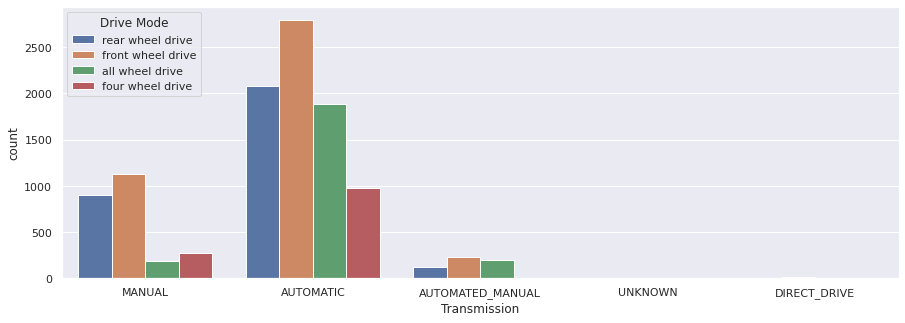

In [ ]:
plt.figure(figsize=(15,5))

# plot countplot on transmission and drive mode
sns.countplot(x="Transmission", hue="Drive Mode", data=df)
plt.show()

# 'Cylinders', y='Price'

### **`Observation:`**
In this count plot, We have plot the feature of Transmission with help of hue.<br>
We can see that the the nos of count and the transmission type and automated manual is plotted. Drive mode as been given with help of hue.<br>


# Visualising Bivariate Distributions


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## 1. Scatterplots
Scatterplots are used to find the correlation between two continuos variables. <br>

Using scatterplot find the correlation between 'HP' and 'Price' column of the data.



`CHECK THIS SCATTERPLOT METHOD ON STACKOVERFLOW`: https://stackoverflow.com/questions/57435771/scatter-plot-with-subplot-in-seaborn

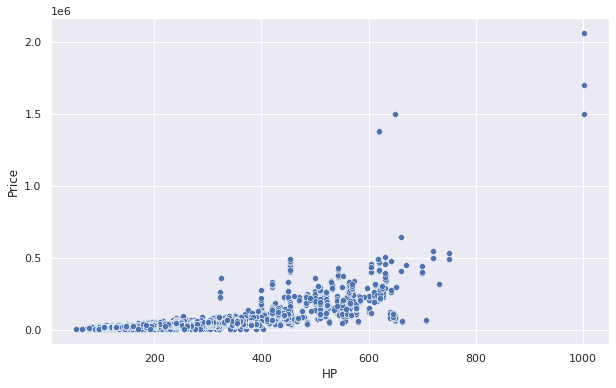

In [ ]:
## Your code here -
fig, ax = plt.subplots(figsize=(10,6))

# plot scatterplot on hp and price
sns.scatterplot(x = "HP", y = "Price", data = df)
plt.show()


### **`Observation:`**<br>
It is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.<br>
We have plot the scatter plot with x axis as HP and y axis as Price.<br>
The data points between the features should be same either wise it give errors.<br>


## 4. joint distributions


Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid


`CHECK TYPE OF JOINTPLOT`: https://seaborn.pydata.org/generated/seaborn.jointplot.html

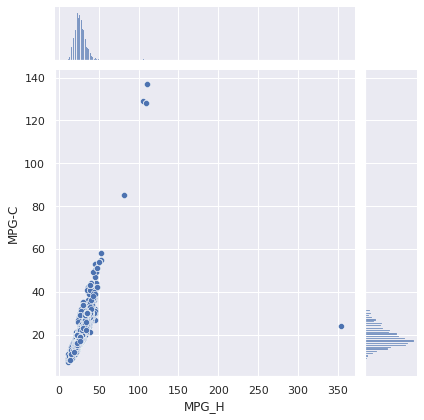

In [ ]:
# joint plots of MPG_H and MPG-C
sns.jointplot(x = "MPG_H", y = "MPG-C", data = df)
plt.show()


### **`Observations:`**<br>
Jointplot is  library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.<br>
In this plot we can see the relationship of MPG-C abd MPG_H.

You can adjust the arguments of the jointplot() to make the plot more readable.

## 5. Plotting Aggregated Values across Categories


### Bar Plots - Mean, Median and Count Plots


Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure.

For example, say you want to visualise and *compare the Price across Cylinders*. The ```sns.barplot()``` function can be used to do that.


`BARPLOT USING SEABORN`: https://seaborn.pydata.org/generated/seaborn.barplot.html

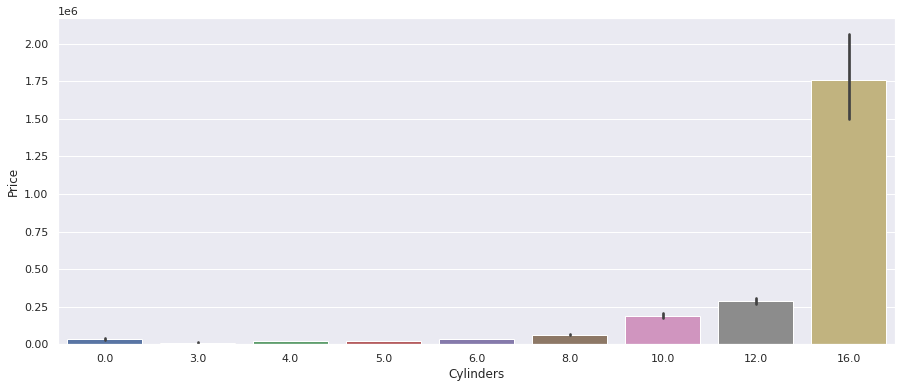

In [ ]:
# bar plot with default statistic=mean between Cylinder and Price
plt.figure(figsize = (15, 6))
sns.barplot(x = "Cylinders", y = "Price", data = df)
plt.show()




### **`Observation:`**<br>
By default, seaborn plots the mean value across categories, though you can plot the count, median, sum etc.<br>
Also, barplot computes and shows the confidence interval of the mean as well.



### `When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis. Let's now *drill down into Transmission sub categories*.`

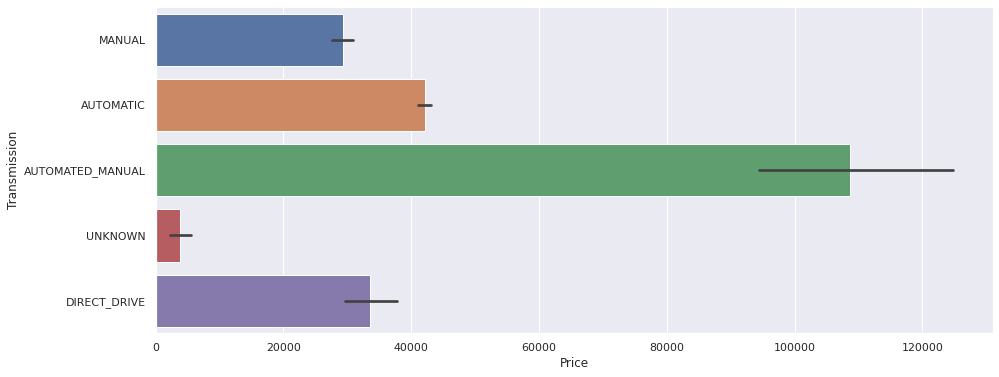

In [ ]:
# Plotting categorical variable Transmission across the y-axis
plt.figure(figsize = (15, 6))
sns.barplot(x= "Price", y = "Transmission", data = df)
plt.show()



Plot bar plot for Price and Transmission with hue="Drive Mode"


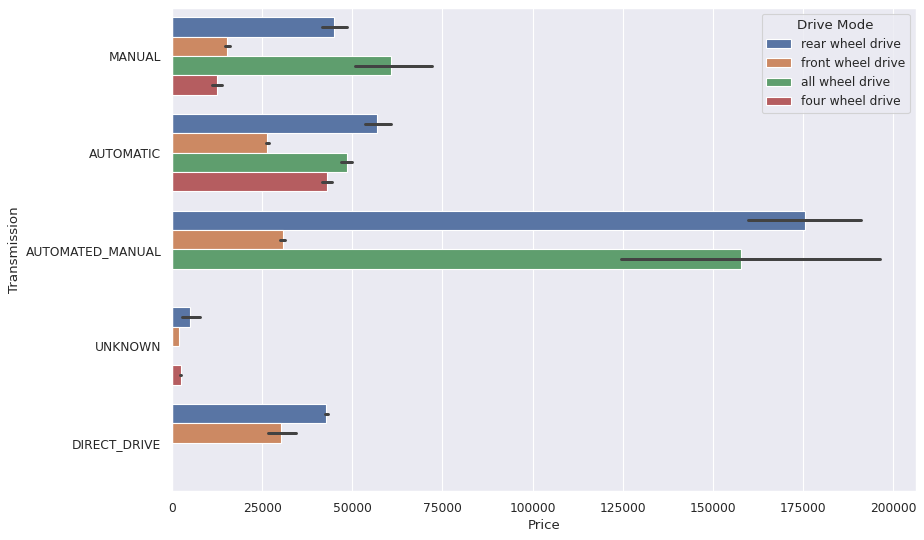

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# Plot bar plot for Price and Transmission , specify hue="Drive Mode"
sns.barplot(x= "Price", y = "Transmission", hue = "Drive Mode", data = df)
plt.show()


These plots looks beutiful isn't it? In Data Analyst life such charts are there unavoidable friend.:)

# Multivariate Plots



# 1. Pairplot

Plot a pairplot for the dataframe df.



`SEABORN PAIRPLOT`: https://seaborn.pydata.org/generated/seaborn.pairplot.html

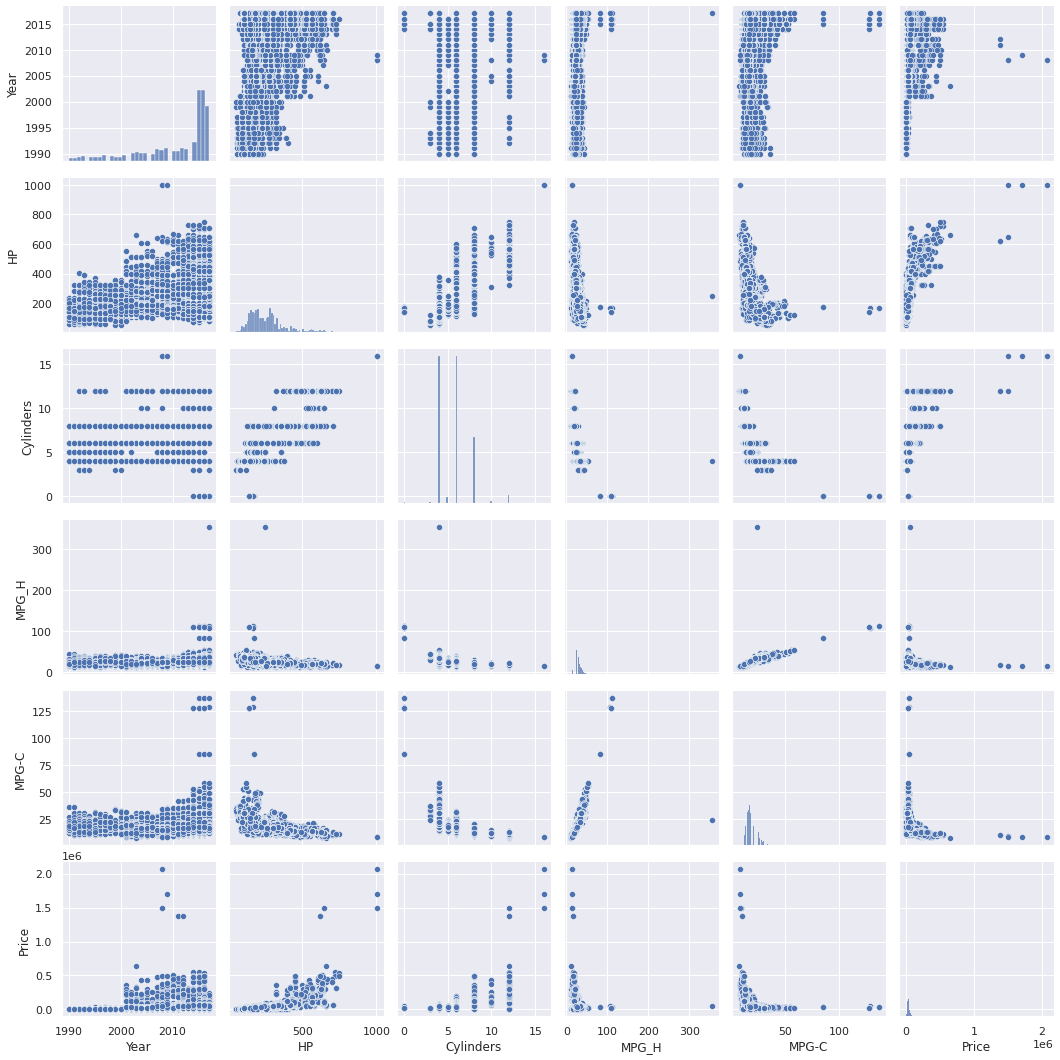

In [ ]:
# plot pairplot on df
sns.pairplot(df)
plt.show()

### **`Observation:`**<br>
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

## 2.  Heatmaps


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

Using heatmaps plot the correlation between the features present in the dataset.

`SEABORN HEATMAP`: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
#find the correlation of features of the data
corr = df.corr()

# print corr
corr

,Year,HP,Cylinders,MPG_H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG_H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


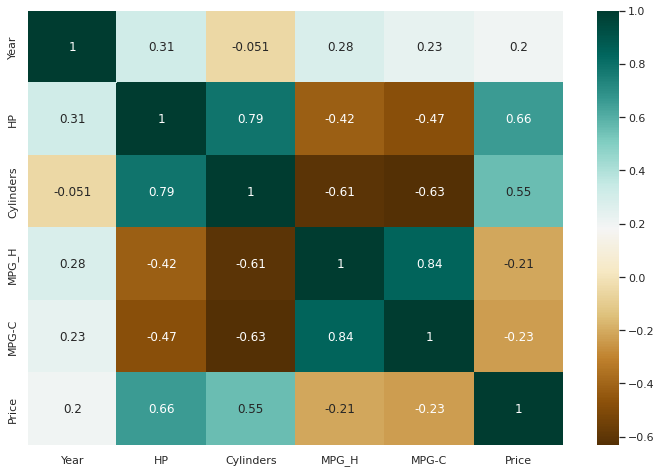

In [ ]:
# Using the correlated df, plot the heatmap
# set cmap = 'BrBG', annot = True - to get the same graph as shown below
# set size of graph = (12,8)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap = 'BrBG', annot= True)
plt.show()

### **`Observation:`**<br>
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.


The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1.
